

ASSN - 7 : Decision Trees



Name : V TEJAS

Register number : 3122 21 5001 116

Class : CSE - B




## Importing Necessary Libraries

In [63]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [64]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns



In [65]:
data=pd.read_csv("/content/drive/MyDrive/SEM-6/ML Lab/A-7/diabetes_prediction_dataset.csv")
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [66]:
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [68]:
#Find number of rows and columns

num_rows, num_columns = data.shape
print(data.shape)

(100000, 9)


In [69]:
#Distribution
data['diabetes'].value_counts()

diabetes
0    91500
1     8500
Name: count, dtype: int64

# Preprocessing


#### Handling Missing Values

In [70]:
missing_values=data.isnull().sum()
missing_values

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

#### Encoding

In [71]:
#Convert Categorical variables into binary and numeric
label_encoder = preprocessing.LabelEncoder()
data['smoking_history'] = label_encoder.fit_transform(data['smoking_history'])
data['gender'] = label_encoder.fit_transform(data['gender'])
data.head()



,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


In [72]:
numeric_data = data.select_dtypes(include='number')
print(numeric_data)


       gender   age  hypertension  heart_disease  smoking_history    bmi  \
0           0  80.0             0              1                4  25.19   
1           0  54.0             0              0                0  27.32   
2           1  28.0             0              0                4  27.32   
3           0  36.0             0              0                1  23.45   
4           1  76.0             1              1                1  20.14   
...       ...   ...           ...            ...              ...    ...   
99995       0  80.0             0              0                0  27.32   
99996       0   2.0             0              0                0  17.37   
99997       1  66.0             0              0                3  27.83   
99998       0  24.0             0              0                4  35.42   
99999       0  57.0             0              0                1  22.43   

       HbA1c_level  blood_glucose_level  diabetes  
0              6.6                 

In [73]:
# Selecting the numerical columns (excluding binary columns for hypertension, heart_disease, diabetes)
numerical_columns = ['age', 'bmi', 'HbA1c_level','smoking_history', 'blood_glucose_level']

In [74]:
# Calculate Z-scores for numeric columns
z_scores = data[numerical_columns].apply(stats.zscore)
print(z_scores)

            age       bmi  HbA1c_level  smoking_history  blood_glucose_level
0      1.692704 -0.321056     1.001706         0.963327             0.047704
1      0.538006 -0.000116     1.001706        -1.153468            -1.426210
2     -0.616691 -0.000116     0.161108         0.963327             0.489878
3     -0.261399 -0.583232    -0.492690        -0.624269             0.416183
4      1.515058 -1.081970    -0.679490        -0.624269             0.416183
...         ...       ...          ...              ...                  ...
99995  1.692704 -0.000116     0.628107        -1.153468            -1.180558
99996 -1.771388 -1.499343     0.908306        -1.153468            -0.934905
99997  1.070944  0.076729     0.161108         0.434128             0.416183
99998 -0.794336  1.220361    -1.426688         0.963327            -0.934905
99999  0.671241 -0.736922     1.001706        -0.624269            -1.180558

[100000 rows x 5 columns]


In [75]:
# Define threshold for outlier detection (e.g., Z-Score > 3)
threshold = 3
# Find outliers
outliers = data[z_scores > threshold]
print(outliers)

       gender  age  hypertension  heart_disease  smoking_history  bmi  \
0         NaN  NaN           NaN            NaN              NaN  NaN   
1         NaN  NaN           NaN            NaN              NaN  NaN   
2         NaN  NaN           NaN            NaN              NaN  NaN   
3         NaN  NaN           NaN            NaN              NaN  NaN   
4         NaN  NaN           NaN            NaN              NaN  NaN   
...       ...  ...           ...            ...              ...  ...   
99995     NaN  NaN           NaN            NaN              NaN  NaN   
99996     NaN  NaN           NaN            NaN              NaN  NaN   
99997     NaN  NaN           NaN            NaN              NaN  NaN   
99998     NaN  NaN           NaN            NaN              NaN  NaN   
99999     NaN  NaN           NaN            NaN              NaN  NaN   

       HbA1c_level  blood_glucose_level  diabetes  
0              NaN                  NaN       NaN  
1              NaN 

#### Outlier Detection

In [76]:
outliers_count = (z_scores.abs() > threshold).sum()
tot_outliers = (z_scores.abs() > threshold).sum().sum()
print("Number of outliers:", outliers_count)
print("Total Number of outliers:", tot_outliers)

Number of outliers: age                       0
bmi                    1294
HbA1c_level            1315
smoking_history           0
blood_glucose_level    1403
dtype: int64
Total Number of outliers: 4012


#### Normalization and Standardization

In [77]:
# normalization
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to the data and transform it
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Display the first few rows to verify the normalization
print(data.head())



   gender       age  hypertension  heart_disease  smoking_history       bmi  \
0       0  1.000000             0              1              0.8  0.177171   
1       0  0.674675             0              0              0.0  0.202031   
2       1  0.349349             0              0              0.8  0.202031   
3       0  0.449449             0              0              0.2  0.156863   
4       1  0.949950             1              1              0.2  0.118231   

   HbA1c_level  blood_glucose_level  diabetes  
0     0.563636             0.272727         0  
1     0.563636             0.000000         0  
2     0.400000             0.354545         0  
3     0.272727             0.340909         0  
4     0.236364             0.340909         0  


In [78]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Assuming 'numerical_columns' is a list of the numerical column names in your DataFrame
# Fit the scaler to the data and transform it
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Display the first few rows to verify the standardization
print(data.head())

   gender       age  hypertension  heart_disease  smoking_history       bmi  \
0       0  1.692704             0              1         0.963327 -0.321056   
1       0  0.538006             0              0        -1.153468 -0.000116   
2       1 -0.616691             0              0         0.963327 -0.000116   
3       0 -0.261399             0              0        -0.624269 -0.583232   
4       1  1.515058             1              1        -0.624269 -1.081970   

   HbA1c_level  blood_glucose_level  diabetes  
0     1.001706             0.047704         0  
1     1.001706            -1.426210         0  
2     0.161108             0.489878         0  
3    -0.492690             0.416183         0  
4    -0.679490             0.416183         0  


## Exploratory Data Analysis

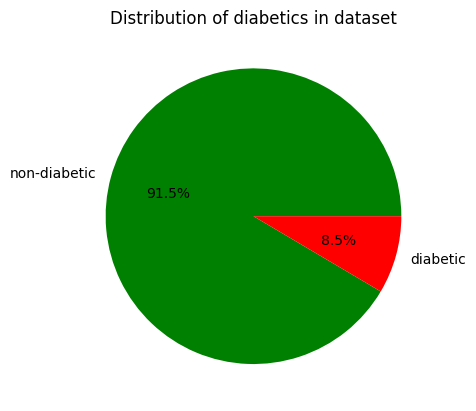

In [79]:
plt.pie(data['diabetes'].value_counts(), colors=['green','red'], labels = ['non-diabetic', 'diabetic'], autopct = '%1.1f%%')
#autopct='%1.1f%%' formats the numeric values displayed on the pie chart to show one decimal place followed by a percentage sign. This means each segment of the pie chart will display the percentage of the whole.
plt.title("Distribution of diabetics in dataset")
plt.show()


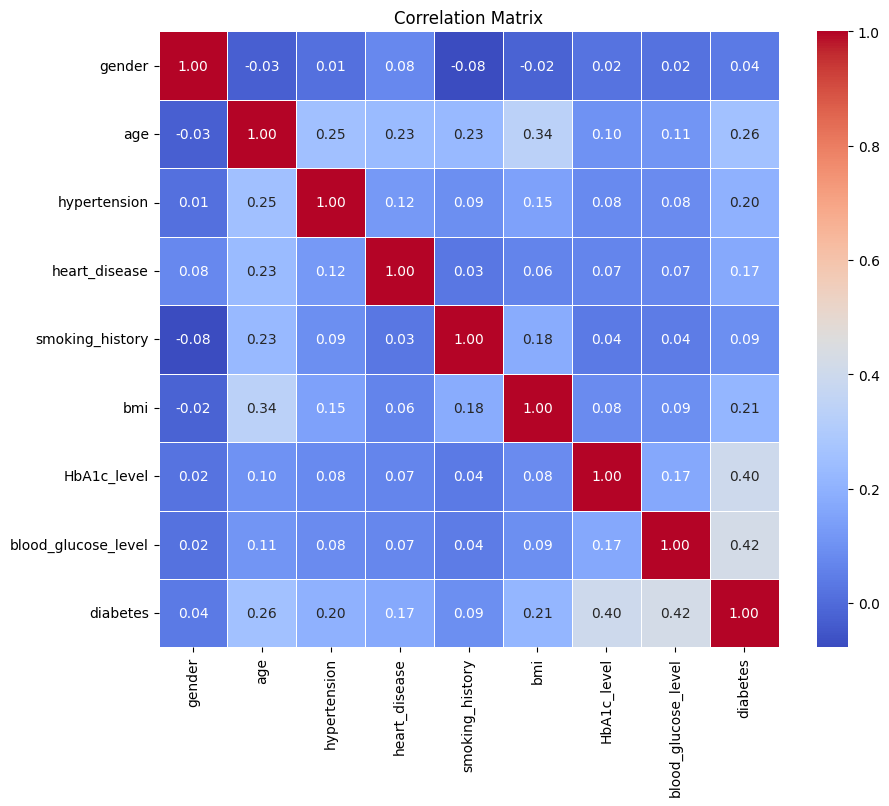

In [80]:
# Heatmap for correlation matrix
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()



## Train-Test Split

In [81]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, confusion_matrix

import matplotlib.pyplot as plt
X = data.drop(columns=['diabetes'], axis=1)
y = data['diabetes']

# Create and split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


## Training the model (for impurity measures 'entropy' and 'gini index')

In [82]:

# Create Decision Tree models with entropy and Gini index criteria
tree_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
tree_gini = DecisionTreeClassifier(criterion='gini', random_state=42)


In [83]:

# Fit models to training data
tree_entropy.fit(X_train, y_train)
tree_gini.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

## Testing the model

In [84]:
# Predictions
y_pred_entropy_train = tree_entropy.predict(X_train)
y_pred_gini_train = tree_gini.predict(X_train)


y_pred_entropy_test = tree_entropy.predict(X_test)
y_pred_gini_test = tree_gini.predict(X_test)


## Results

In [85]:
# Accuracy on training and testing data
accuracy_entropy_train = accuracy_score(y_train, y_pred_entropy_train)
accuracy_gini_train = accuracy_score(y_train, y_pred_gini_train)

accuracy_entropy_test = accuracy_score(y_test, y_pred_entropy_test)
accuracy_gini_test = accuracy_score(y_test, y_pred_gini_test)

print("Accuracy on training data using entropy:", accuracy_entropy_train)
print("Accuracy on training data using Gini index:", accuracy_gini_train)
print("Accuracy on testing data using entropy:", accuracy_entropy_test)
print("Accuracy on testing data using Gini index:", accuracy_gini_test)


Accuracy on training data using entropy: 0.9993142857142857
Accuracy on training data using Gini index: 0.9993142857142857
Accuracy on testing data using entropy: 0.9542333333333334
Accuracy on testing data using Gini index: 0.9529333333333333


In [86]:

# Classification report
print("\nClassification Report - Testing Data (Entropy):\n", classification_report(y_test, y_pred_entropy_test))
print("\nClassification Report - Testing Data (Gini):\n", classification_report(y_test, y_pred_gini_test))



Classification Report - Testing Data (Entropy):
               precision    recall  f1-score   support

           0       0.97      0.98      0.98     27453
           1       0.73      0.73      0.73      2547

    accuracy                           0.95     30000
   macro avg       0.85      0.85      0.85     30000
weighted avg       0.95      0.95      0.95     30000


Classification Report - Testing Data (Gini):
               precision    recall  f1-score   support

           0       0.98      0.97      0.97     27453
           1       0.72      0.74      0.73      2547

    accuracy                           0.95     30000
   macro avg       0.85      0.85      0.85     30000
weighted avg       0.95      0.95      0.95     30000



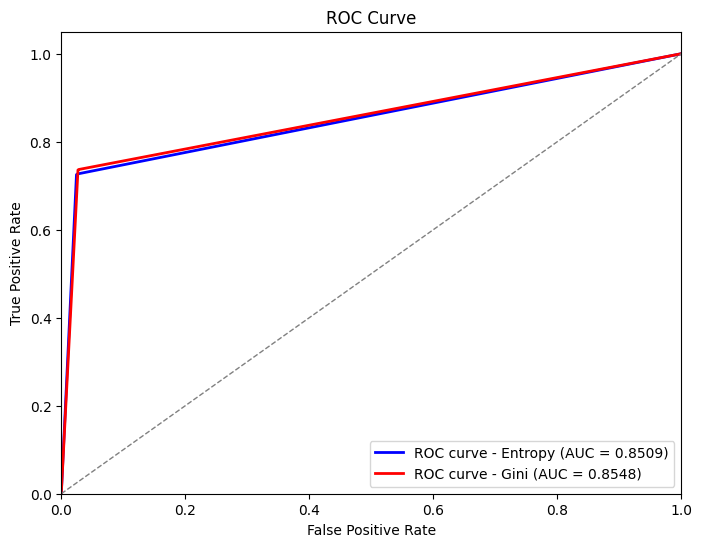

In [87]:
# AUC-ROC curve
y_pred_proba_entropy = tree_entropy.predict_proba(X_test)[:, 1]
y_pred_proba_gini = tree_gini.predict_proba(X_test)[:, 1]

auc_entropy = roc_auc_score(y_test, y_pred_proba_entropy)
auc_gini = roc_auc_score(y_test, y_pred_proba_gini)

fpr_entropy, tpr_entropy, _ = roc_curve(y_test, y_pred_proba_entropy)
fpr_gini, tpr_gini, _ = roc_curve(y_test, y_pred_proba_gini)

plt.figure(figsize=(8, 6))
plt.plot(fpr_entropy, tpr_entropy, color='blue', lw=2, label=f'ROC curve - Entropy (AUC = {auc_entropy:.4f})')
plt.plot(fpr_gini, tpr_gini, color='red', lw=2, label=f'ROC curve - Gini (AUC = {auc_gini:.4f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


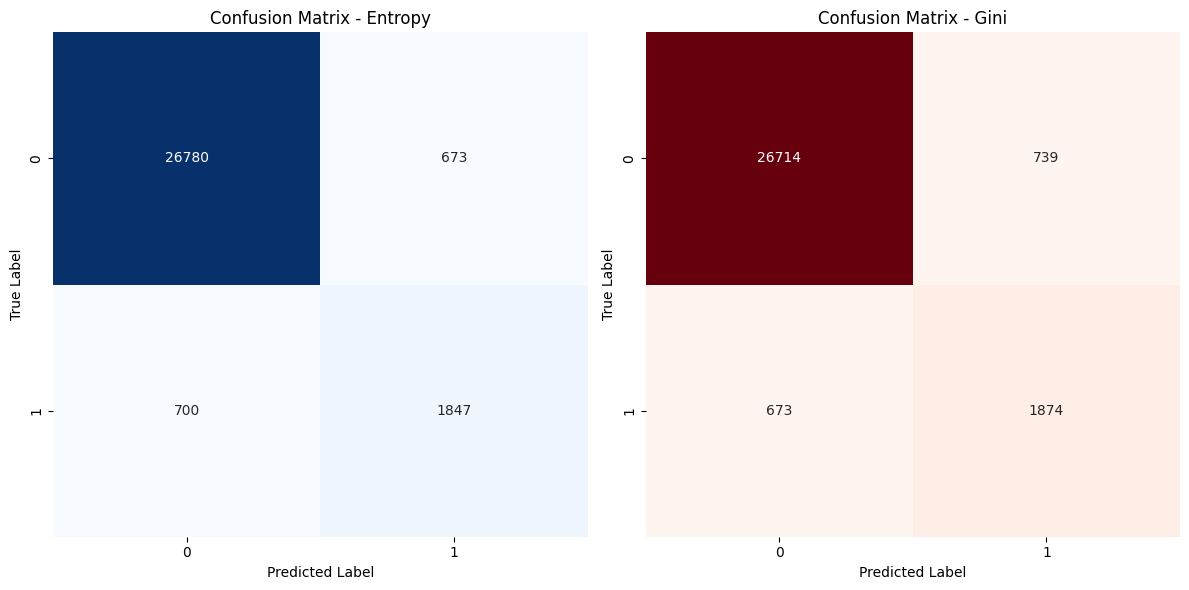

In [88]:
# Confusion Matrix Plot

conf_matrix_entropy = confusion_matrix(y_test, y_pred_entropy_test)
conf_matrix_gini = confusion_matrix(y_test, y_pred_gini_test)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_entropy, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Confusion Matrix - Entropy')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_gini, annot=True, cmap='Reds', fmt='d', cbar=False)
plt.title('Confusion Matrix - Gini')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.tight_layout()
plt.show()

## Inference

Based on the evaluation metrics, both models perform well on the testing data. However, the Gini index-based model edges slightly ahead:

- Accuracy: Both models achieve high accuracy, with the entropy-based model slightly outperforming the Gini index-based model by a small margin.

- AUC: The Gini index-based model exhibits a slightly higher AUC compared to the entropy-based model, indicating better overall performance in distinguishing between positive and negative instances.

- Confusion Matrix: The Gini index-based model shows slightly fewer false positives and false negatives compared to the entropy-based model, suggesting better precision and recall.

- Classification Report: Both models demonstrate similar precision, recall, and F1-score values for both classes, indicating comparable predictive accuracy.

Considering these factors, while both models perform well, the Gini index-based model shows a slightly better overall performance. However, the difference in performance between the two models is minimal.